In [1]:
import pandas as pd
import Quandl
df = Quandl.get('WIKI/AAPL', trim_start='2010-04-01', verbose=1)

No authentication tokens found: usage will be limited.
See www.quandl.com/api for more information.
Returning Dataframe for  WIKI/AAPL


In [89]:
pred_cols = [x for x in df.columns if x.startswith('Adj')]
N = 3
m, n = df.shape
X = np.empty((m - N, n * N))
y = np.empty((m - N, len(pred_cols)))
for i in range(m - N):
    X[i,:] = df.iloc[i:(i+N)].stack().values
    y[i,:] = df[pred_cols].diff().iloc[i+N].values

dates = df.index[i+N:]
print(X.shape, y.shape)

import sklearn.preprocessing as prep
X = prep.StandardScaler().fit_transform(X) # cheat by doing this before cv
y = prep.StandardScaler().fit_transform(y) # cheat by doing this before cv

import sklearn.model_selection as cv
X, Xtest, y, ytest = cv.train_test_split(X, y, test_size=0.4)

(1451, 36) (1451, 5)


{'base': 0.8732022292620486,
 'test': 0.9467752090305952,
 'train': 0.5843289658659887}

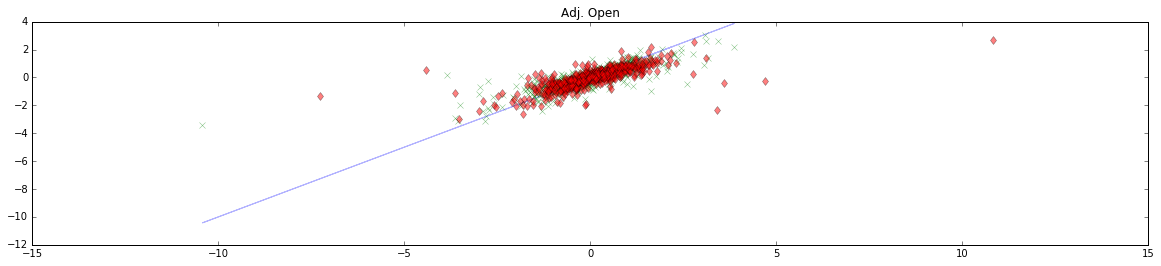

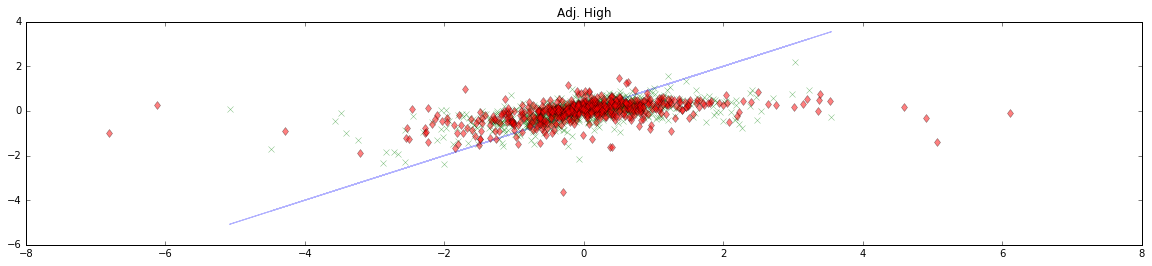

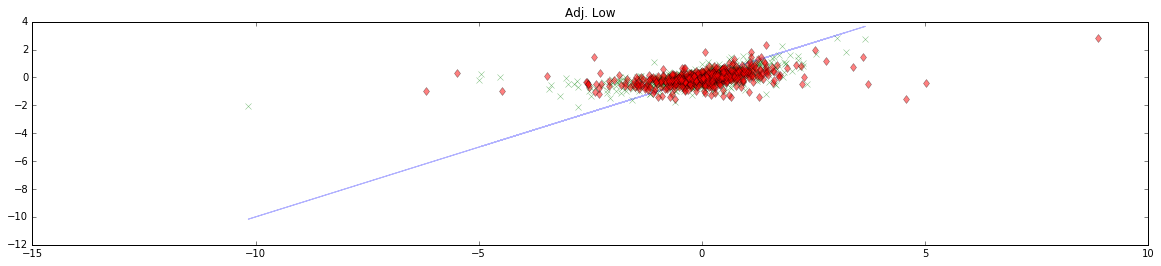

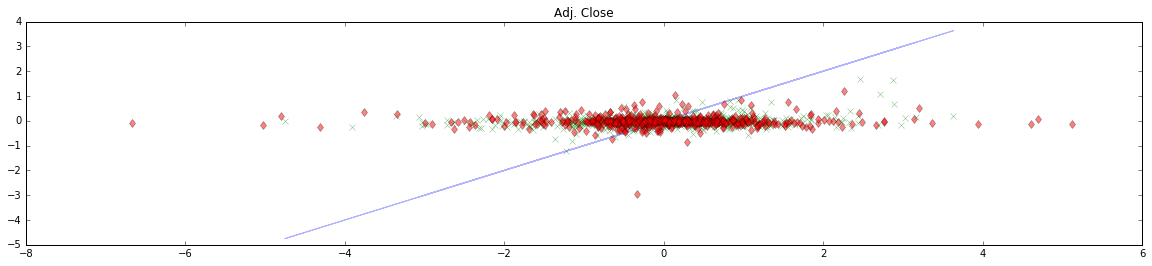

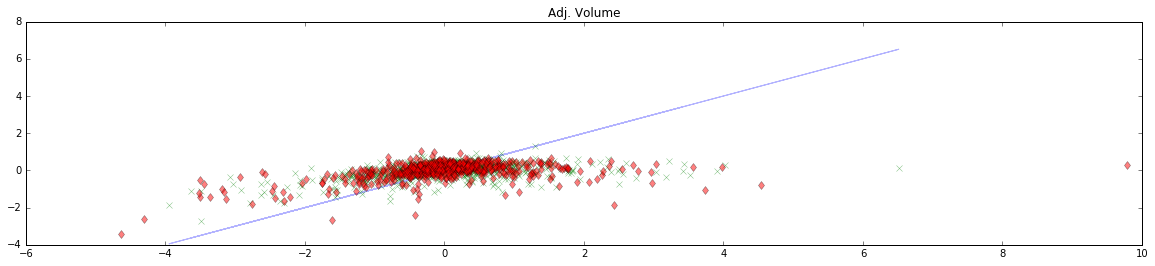

In [92]:
%matplotlib inline
import sklearn.linear_model as lm
import sklearn.ensemble as se
e = lm.RidgeCV(cv=5)
e.fit(X, y)
e = lm.Ridge(alpha=e.alpha_) # how to get best estimator from RidgeCV?
e.fit(X, y)
yp = e.predict(X)
ypt = e.predict(Xtest)

for i in range(len(pred_cols)):
    figure(figsize=(20, 4))
    plot(y[:,i], y[:,i], '-', alpha=0.3)
    plot(y[:,i], yp[:,i], 'x', alpha=0.5)
    plot(ytest[:,i], ypt[:,i], 'd', alpha=0.5)
    title(pred_cols[i])

mse = lambda x: np.mean(x ** 2)

res = dict(base=mse(y - np.mean(y)), test=mse(ytest - ypt), train=mse(y - yp))
res
